R-squared (R²): 0.43485202112915977
Mean Absolute Error (MAE): 0.01845067508403895
Root Mean Squared Error (RMSE): 0.022582000211282337


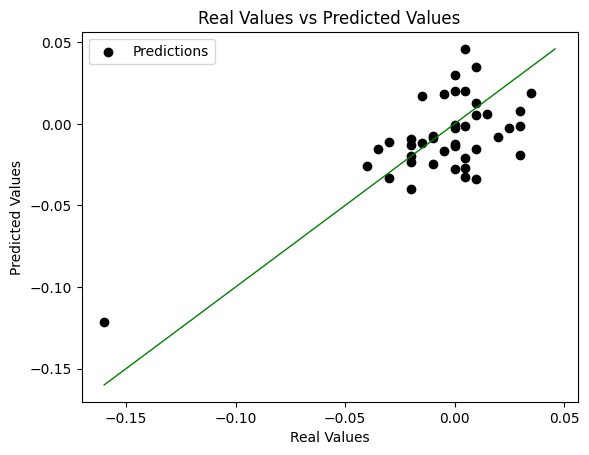

In [107]:
# Load Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, f1_score

# Load data

df = pd.read_csv("data.csv")

# Linear Regression Model
x = df.drop('diff_Close_next_1day', axis=1)
y = df['diff_Close_next_1day']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train) 
pred = lr_model.predict(X_test)

df_compare=pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': pred})

# Calculate R-squared (R²)
r2 = r2_score(y_test, pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# Print the metrics
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot
plt.scatter(y_test, pred, color='black', label='Predictions')
# Add a 45-degree line (y = x)
min_val = min(min(y_test), min(pred))
max_val = max(max(y_test), max(pred))
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='-', linewidth=1)

# Customize the plot
plt.title('Real Values vs Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')

